In [1]:
# https://www.hsph.harvard.edu/thegeocodingproject/u-s-census-tract-poverty-data/

In [2]:
# !pip install xlrd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xlrd

In [4]:
poverty2000 = pd.read_excel("poverty.xlsx")
poverty2000.head()

,area,pct_pov,state,county,tract
0,Alameda County,8.2,6,1,562
1,Alameda County,7.9,6,1,674
2,Alameda County,14.3,6,1,2980
3,Alameda County,20.0,6,1,6000
4,Alameda County,4.5,6,1,11964


In [5]:
# Rename columns
poverty2000.columns = ['PLACE', 'PCT_POV', 'STATE', 'COUNTY', 'TRACT']

In [6]:
# Since they are formatted as ints, the leading zeroes are gone
# Need to add leading zeroes back in, making these geoids 10 digits long
poverty_geoids = np.array([])
for i in range(len(poverty2000)):
    # state IDs are 2 digits long
    state = str(poverty2000.loc[i, "STATE"])
    state = "0" + state
    poverty2000.loc[i, "STATE"] = state
    # county IDs are 3 digits long
    county = str(poverty2000.loc[i, "COUNTY"])
    if len(county)==1:
        county = "00" + county
    elif len(county)==2:
        county = "0" + county
    poverty2000.loc[i, "COUNTY"] = county
    # setting tract ID to be 5 digits long
    tract = str(poverty2000.loc[i, "TRACT"])
    if len(tract)==3:
        tract = "00" + tract
    elif len(tract)==4:
        tract = "0" + tract
    else:
        tract = tract
    poverty2000.loc[i, "TRACT"] = tract
    # Putting the geoid together
    poverty_geoids = np.append(poverty_geoids, state+county+tract)

In [7]:
poverty2000['geoid'] = poverty_geoids
poverty2000.head()

,PLACE,PCT_POV,STATE,COUNTY,TRACT,geoid
0,Alameda County,8.2,06,001,00562,0600100562
1,Alameda County,7.9,06,001,00674,0600100674
2,Alameda County,14.3,06,001,02980,0600102980
3,Alameda County,20.0,06,001,06000,0600106000
4,Alameda County,4.5,06,001,11964,0600111964


In [8]:
len(poverty2000)

273

In [9]:
census2000 = gpd.read_file("census2000")
census2000.head()

,AREA,PERIMETER,TR06_D00_,TR06_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
0,0.058290,1.303878,2,1,06,093,0004,0004,TR,None,POLYGON ((-122.8703150592455 42.00331018482387...
1,0.155340,2.227876,3,2,06,093,0003,0003,TR,None,POLYGON ((-122.3681823792381 42.00931996886273...
2,0.346458,3.272025,4,3,06,093,0005,0005,TR,None,"POLYGON ((-123.230762 42.003845, -123.192361 4..."
3,0.148798,2.018557,5,4,06,093,0002,0002,TR,None,"POLYGON ((-122.161328 42.007637, -122.160438 4..."
4,0.227852,3.327617,6,5,06,015,000202,0002.02,TR,None,"POLYGON ((-124.211605 41.99846, -124.126194 41..."


In [10]:
len(census2000)

7115

In [11]:
# Combining and converting these geoids into strings too
geoid2000 = np.array([])
for i in range(len(census2000)):
    state = str(census2000.loc[i, "STATE"])
    county = str(census2000.loc[i, "COUNTY"])
    tract = str(census2000.loc[i, "TRACT"])
    geoid = state + county + tract
    geoid2000 = np.append(geoid2000, geoid)

KeyboardInterrupt: 

In [ ]:
census2000['geoid'] = geoid2000
census2000.tail()

In [ ]:
# Trying to find if census2000 geoids (which have varying length) match with those in poverty2000
geoid_match = np.array([])
for i in range(len(census2000)):
    cen_county = census2000.loc[i, "COUNTY"]
    cen_tract = census2000.loc[i, "TRACT"]#[0:5]
    matches = np.array([])
    for j in range(len(poverty2000['geoid'])):
        pov_county = poverty2000.loc[j, "COUNTY"]
        pov_tract = poverty2000.loc[j, "TRACT"]
        # See if county IDs matches, and if 5-digit poverty tract ID is contained in census tract ID of varying length
        if (cen_county == pov_county) & (pov_tract in cen_tract):
            matches = np.append(matches, poverty2000.loc[j, 'geoid'])
    # If one or more matches, pick the first one
    if len(matches) >= 1:
        # Print out any matches (only 23)
        print(matches)
        geoid_match = np.append(geoid_match, matches[0])
    else:
        geoid_match = np.append(geoid_match, None)

In [ ]:
census2000['geoid_match'] = geoid_match
census2000.head()

In [ ]:
# Merge tables
# These are the only rows with matches
census2000 = pd.merge(left=census2000, right=poverty2000, left_on="geoid_match", right_on="geoid")
census2000.head()

In [ ]:
len(census2000)

In [ ]:
# Sad plot (scattered areas in San Joaquin County, LA, and SD)
census2000.plot("PCT_POV")

# post summer

What does the census capture w/out looking at poverty?

In [12]:
census2000 = gpd.read_file("census2000")
census2000.head()

,AREA,PERIMETER,TR06_D00_,TR06_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
0,0.058290,1.303878,2,1,06,093,0004,0004,TR,None,POLYGON ((-122.8703150592455 42.00331018482387...
1,0.155340,2.227876,3,2,06,093,0003,0003,TR,None,POLYGON ((-122.3681823792381 42.00931996886273...
2,0.346458,3.272025,4,3,06,093,0005,0005,TR,None,"POLYGON ((-123.230762 42.003845, -123.192361 4..."
3,0.148798,2.018557,5,4,06,093,0002,0002,TR,None,"POLYGON ((-122.161328 42.007637, -122.160438 4..."
4,0.227852,3.327617,6,5,06,015,000202,0002.02,TR,None,"POLYGON ((-124.211605 41.99846, -124.126194 41..."


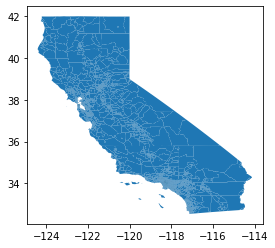

In [13]:
census2000.plot()

In [14]:
la_county = census2000[census2000['COUNTY']=='037']
la_county.head()

,AREA,PERIMETER,TR06_D00_,TR06_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
3004,0.040725,1.146538,3006,3005,06,037,9002,9002,TR,None,"POLYGON ((-117.774816 34.822974, -117.774768 3..."
3005,0.044141,0.968842,3007,3006,06,037,900102,9001.02,TR,None,"POLYGON ((-117.740271 34.822926, -117.731054 3..."
3006,0.020983,0.611415,3008,3007,06,037,9009,9009,TR,None,"POLYGON ((-118.326191 34.819643, -118.290414 3..."
3007,0.067459,1.694209,3009,3008,06,037,901203,9012.03,TR,None,"POLYGON ((-118.326191 34.819643, -118.325487 3..."
3008,0.005816,0.379766,3010,3009,06,037,9003,9003,TR,None,"POLYGON ((-118.14065 34.762686, -118.088456 34..."


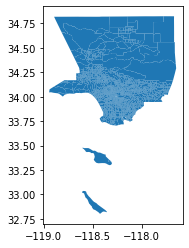

In [15]:
la_county.plot()

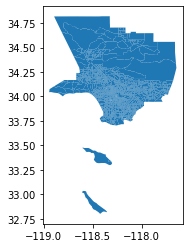

In [16]:
#trying to find weird areas below the others
la_county[~la_county['TRACT'].str.contains('900')].plot()

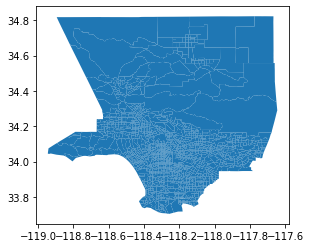

In [17]:
geometries_str = la_county['geometry'].apply(lambda x: x.wkt).values
n = la_county[['33.4' not in i for i in geometries_str]]

geometries_str2 = n['geometry'].apply(lambda x: x.wkt).values
n2 = n[['33.3' not in i for i in geometries_str2]]

geometries_str3 = n2['geometry'].apply(lambda x: x.wkt).values
n3 = n2[['32.9' not in i for i in geometries_str3]]
n3.plot()

In [18]:
actually_la = n3
actually_la.head()

,AREA,PERIMETER,TR06_D00_,TR06_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
3004,0.040725,1.146538,3006,3005,06,037,9002,9002,TR,None,"POLYGON ((-117.774816 34.822974, -117.774768 3..."
3005,0.044141,0.968842,3007,3006,06,037,900102,9001.02,TR,None,"POLYGON ((-117.740271 34.822926, -117.731054 3..."
3006,0.020983,0.611415,3008,3007,06,037,9009,9009,TR,None,"POLYGON ((-118.326191 34.819643, -118.290414 3..."
3007,0.067459,1.694209,3009,3008,06,037,901203,9012.03,TR,None,"POLYGON ((-118.326191 34.819643, -118.325487 3..."
3008,0.005816,0.379766,3010,3009,06,037,9003,9003,TR,None,"POLYGON ((-118.14065 34.762686, -118.088456 34..."


In [19]:
la_import = gpd.read_file('holc_la')
la_import.head()

,name,holc_id,holc_grade,area_descr,geometry
0,None,A1,A,"{ ""0"" : ""Los Angeles County"", ""10"" : ""Caution:...",POLYGON ((-118.4574409245932 34.15201303915654...
1,None,A10,A,"{ ""0"" : ""Los Angeles County"", ""10"" : """", ""1a"" ...","POLYGON ((-118.1115093215506 34.1831108636398,..."
2,None,A11,A,"{ ""0"" : ""Los Angeles County"", ""10"" : """", ""1a"" ...",POLYGON ((-118.1129997308115 34.15985120831089...
3,None,A12,A,"{ ""0"" : ""Los Angeles County"", ""10"" : ""Caution:...",POLYGON ((-118.1712332409884 34.12776025045522...
4,None,A13,A,"{ ""0"" : ""Los Angeles County"", ""10"" : ""Caution:...",(POLYGON ((-118.1745790360271 34.1419437871049...


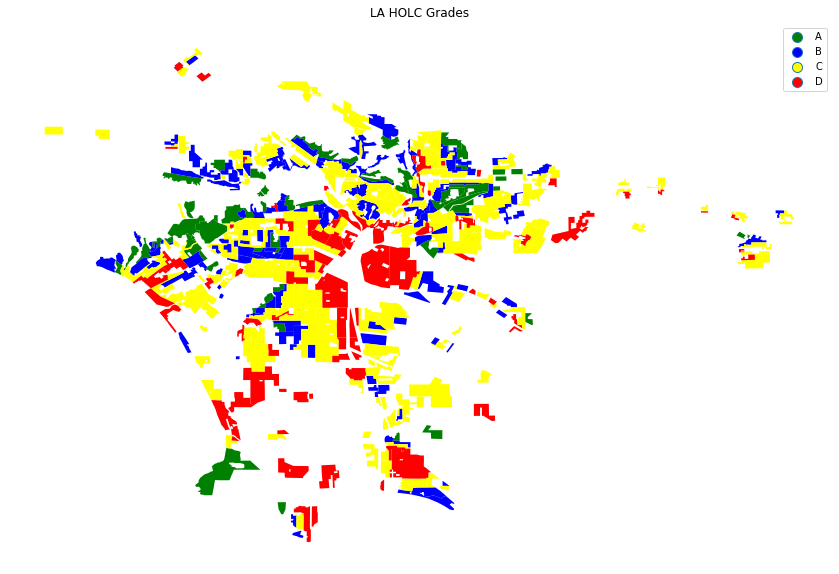

In [20]:
from matplotlib.colors import ListedColormap
# Create a ListedColormap object called holc_cmap, pass in the list of colors
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')
# Plot again, passing holc_cmap into the cmap argument
la_import.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');

# fix borders in plot above
# figure out how to plot them over one another

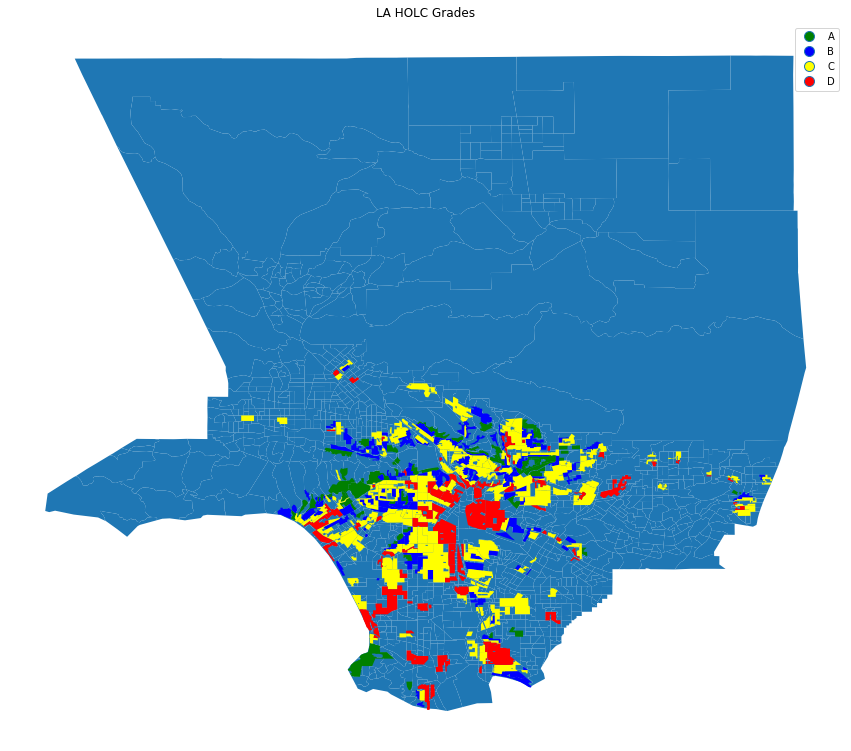

In [27]:


base = n3.plot(figsize=(15, 15))
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')
# Plot again, passing holc_cmap into the cmap argument
la_import.plot(ax= base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');